<font size=5> **MTH9831 Homework5 Numerical Projects** </font>

<font size=3> **Team members:** </font>
- Chu, Gujia
- Twahir, Omar
- Wu, Chengxun
- Zhu, Bin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import fsolve

# Project 10.1

Black-Scholes calculator. Define a function in Python using def that takes as inputs the parameters $𝑇, 𝐾, 𝑆_𝑡, 𝑡, 𝑟, 𝜎$ and returns the prices of a European call and a European put in the Black-Scholes model as in equation (10.19).

$$f(t, S_t)=C_t=S_tN(d_+)-Ke^{-r(T-t)}N(d_-)\quad (10.19)$$

To evaluate the CDF of a standard normal random variable you can import the command norm from scipy.stats in Python.

In [2]:
def BS(T, K, S, t, r, sigma):
    """return the price of a European call and put in BS model"""
    tau = T - t
    d1 = (np.log(S / K) +
          (r + sigma * sigma / 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    c = S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)
    p = K * np.exp(-r * tau) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return c, p

Its functionality can be tested in the following projects as a fundamental tool.

# Project 10.2

Option strategies. Consider the option strategies in Example 10.8 including the European call option. Consider the parameters $𝜎 = 0.1, 𝑇 = 1$, and $𝐾 = 480$ as in Example 10.16.

(1) Covered call. The strategy consists of being short one call option with strike price $K$ and long in the underlying asset. In other words, the payoff at expiration is
$$
-C_T+S_T= \begin{cases}S_T & \text { if } 0 \leq S_T \leq K, \\ K & \text { if } S_T>K .\end{cases}
$$
The covered call allows the writer of the option to protect against a large $S_T$. Indeed, if the writer did not own the asset, the loss of the position would be $S_T-K$, which is unbounded in $S_T$.

(2) Straddle. The strategy consists of being long one call option with strike price $K$ and long one put option with same strike price and same expiration. The payoff is then
$$
C_T+P_T=\left\{\begin{array}{ll}
K-S_T & \text { if } 0 \leq S_T \leq K, \\
S_T-K & \text { if } S_T>K
\end{array} \quad=\left|S_T-K\right|\right.
$$
The payoff of this option gets larger as $S_T$ deviates substantially from $K$.

(3) Bull call spread. This strategy consists of one long call option at strike price $K$ (option 1) and of one short call options at a higher strike, say $K+a$ (option 2). Both are assumed to have the same expiration. The payoff at expiration is then
$$
C_T^{(1)}-C_T^{(2)}= \begin{cases}0 & \text { if } 0 \leq S_T \leq K \\ S_T-K & \text { if } K \leq S_T \leq K+a, \\ a & \text { if } S_T>K+a\end{cases}
$$

(4) Bear call spread. This strategy consists of one short call option at strike price $K$ (option 1) and of one long call option at a higher strike, say $K+a$ (option 2). The payoff at expiration is then
$$
-C_T^{(1)}+C_T^{(2)}= \begin{cases}0 & \text { if } 0 \leq S_T \leq K, \\ K-S_T & \text { if } K \leq S_T \leq K+a, \\ -a & \text { if } S_T>K+a .\end{cases}
$$
This is the other side of a bull call spread contract.

(5) Butterfly. The strategy consists of being long one call option with strike price $K-a$ (option 1), short two call options with strike price $K$ (option 2), and long one call option with strike price $K+a$ (option 3), all with the same expiration.
$$
C_T^{(1)}-2 C_T^{(2)}+C_T^{(3)}= \begin{cases}0 & \text { if } 0 \leq S_T \leq K-a, \\ S_T-(K-a) & \text { if } K-a \leq S_T \leq K, \\ K+a-S_T & \text { if } K \leq S_T \leq K+a, \\ 0 & \text { if } S_T>K+a .\end{cases}
$$

In [3]:
# the payoff functions
# inputs of lambda function: ST and K: stock price at maturity and the strike price

call_payoff = lambda ST, K: max(ST-K, 0)
covered_call_payoff = lambda ST, K: min(ST, K)
straddle_payoff = lambda ST, K: abs(ST - K)
bull_call_spread_payoff = lambda ST, K, a: max(ST-K, 0) if ST<=K+a else a
bear_call_spread_payoff = lambda ST, K, a: min(K-ST, 0) if ST<=K+a else -a
butterfly_payoff = lambda ST, K, a: max(ST-(K-a), 0) if ST<= K else max(K+a-ST, 0)

(a) Draw the graph of the payoff of the six options as a function of $𝑆_𝑇$ , the price of the underlying asset at expiration for $𝑆_𝑇 =[400,550]$. Use $𝑎=20$.

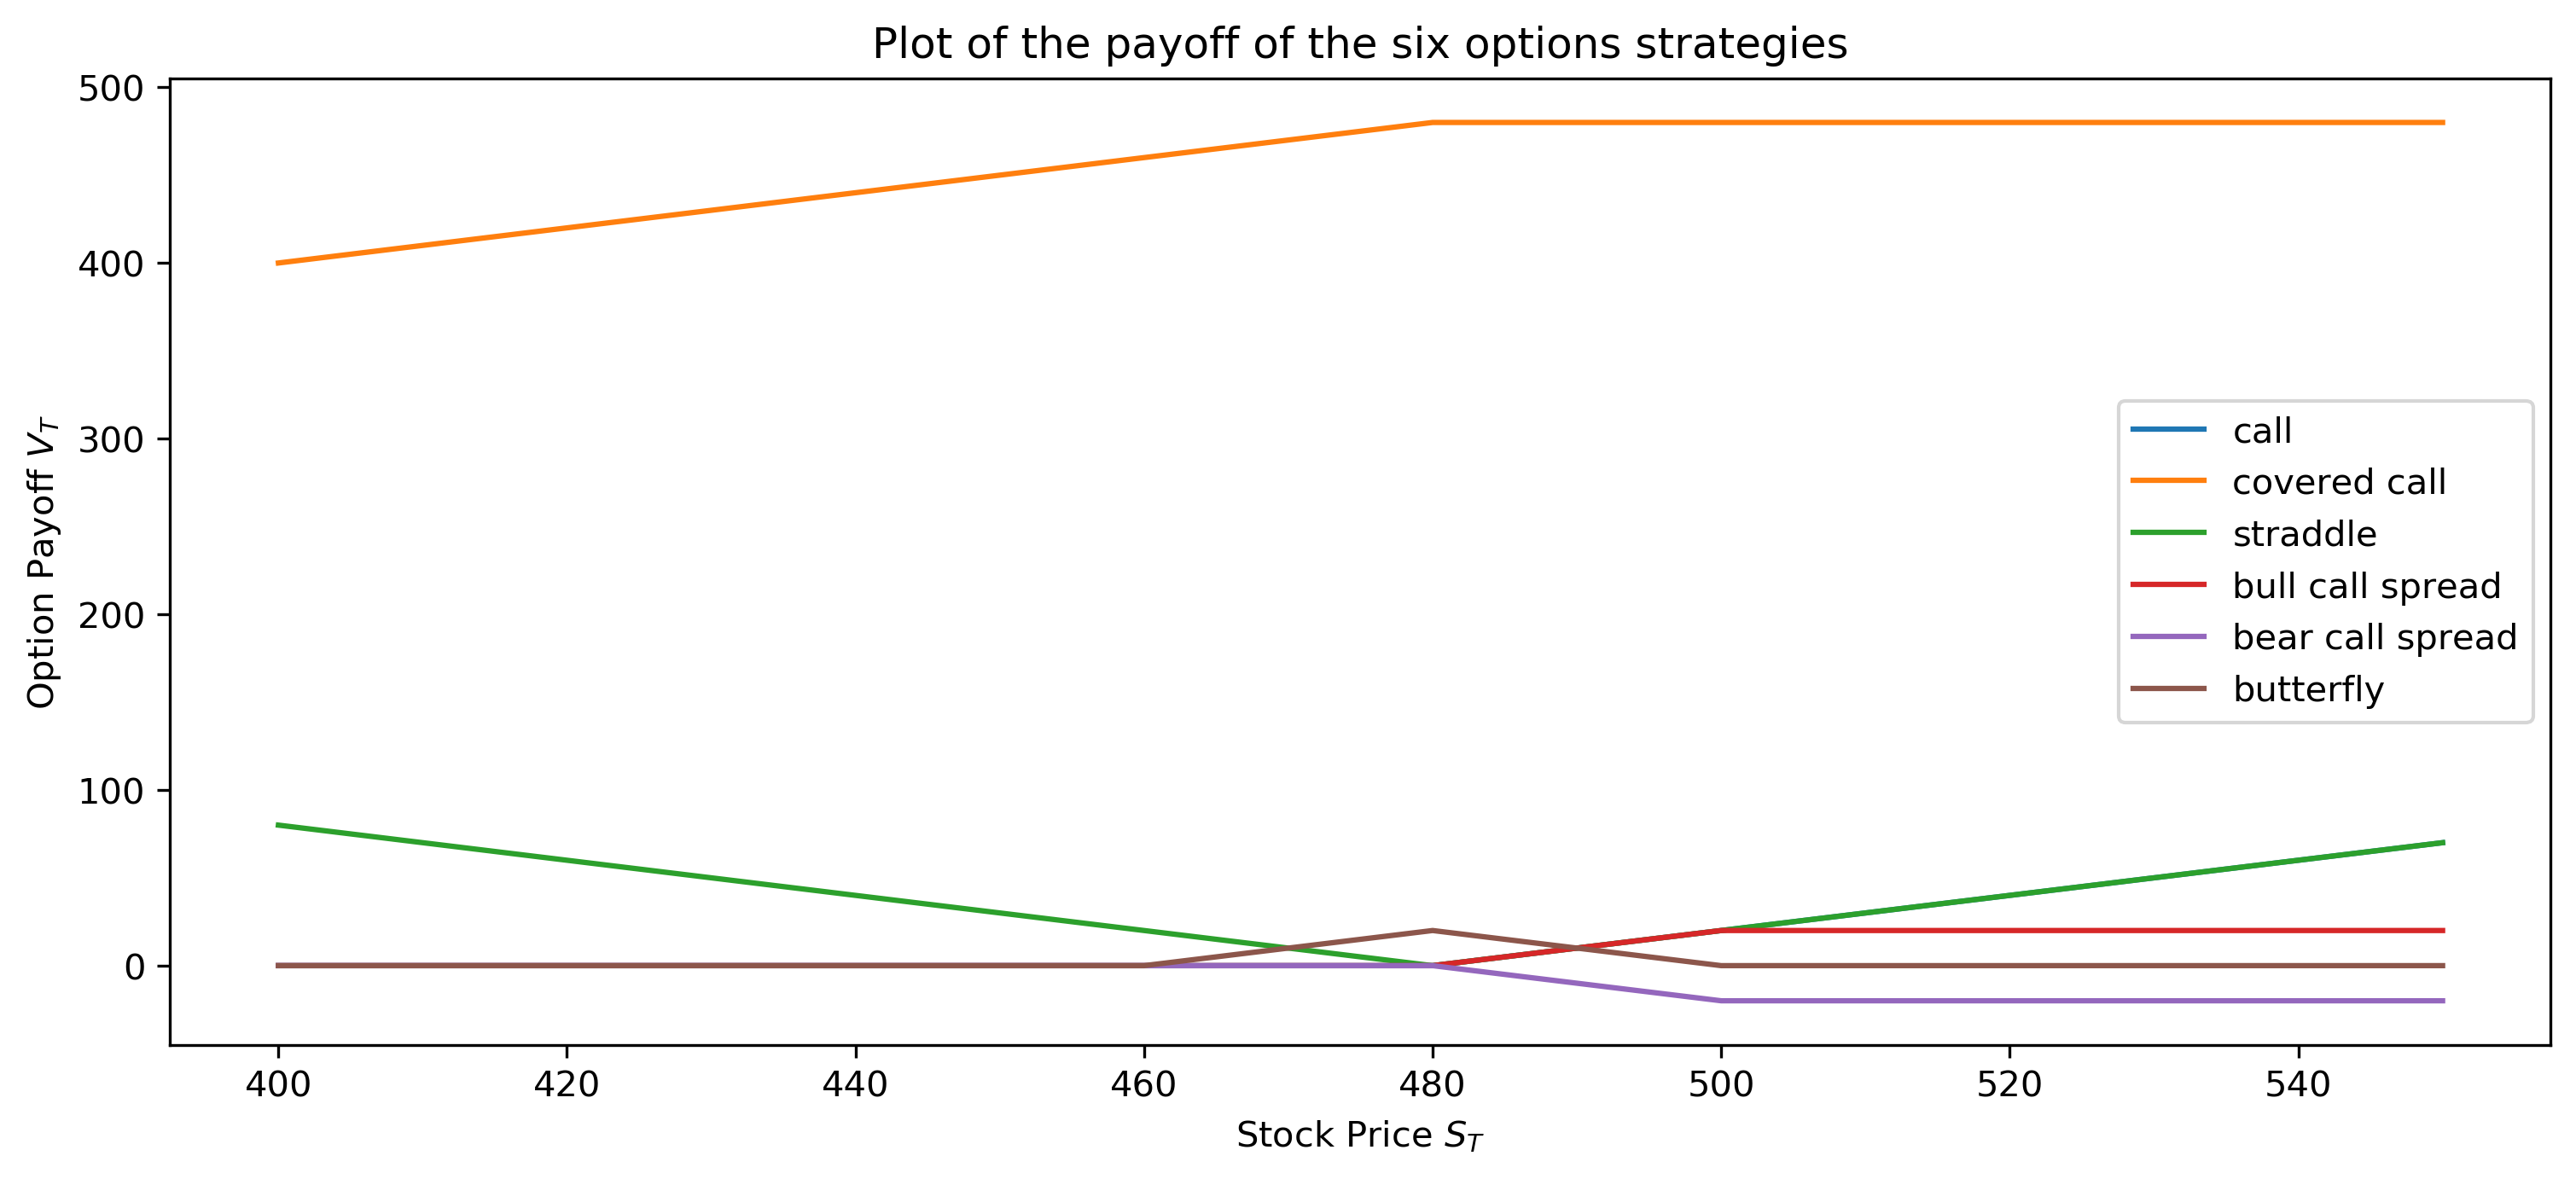

In [4]:
sigma = 0.1
T = 1
K = 480
a = 20

dt = 1
m = int(150 / dt) + 1
x = 400 + np.array(list(range(m))) * dt
call_paths = [call_payoff(400 + dt * i, K) for i in range(m)]
covered_call_paths = [covered_call_payoff(400 + dt * i, K) for i in range(m)]
straddle_paths = [straddle_payoff(400 + dt * i, K) for i in range(m)]
bull_call_spread_paths = [
    bull_call_spread_payoff(400 + dt * i, K, a) for i in range(m)
]
bear_call_spread_paths = [
    bear_call_spread_payoff(400 + dt * i, K, a) for i in range(m)
]
butterfly_paths = [butterfly_payoff(400 + dt * i, K, a) for i in range(m)]

plt.figure(figsize=(12, 5), dpi=300)

plt.plot(x, call_paths, label="call")
plt.plot(x, covered_call_paths, label="covered call")
plt.plot(x, straddle_paths, label="straddle")
plt.plot(x, bull_call_spread_paths, label="bull call spread")
plt.plot(x, bear_call_spread_paths, label="bear call spread")
plt.plot(x, butterfly_paths, label="butterfly")

plt.title("Plot of the payoff of the six options strategies")
plt.xlabel("Stock Price $S_T$")
plt.ylabel("Option Payoff $V_T$")
plt.legend()
plt.show()

(b) Use the Black-Scholes formula of a call in equation (10.19) to generate the value of each of the strategies at time 0 at every 0.1, from $𝑆_0 = 400$ to $𝑆_0 = 600$. Plot it for $𝑟 = 0$ and $𝑟 = 0.05$. Notice the difference.

In [5]:
# the payoff functions that calculates the BS prices for different options strategies.
def get_BS_payoffs(T, K, S, t, r, sigma, a):
    C, P = BS(T, K, S, t, r, sigma)
    C2, P2 = BS(T, K - a, S, t, r, sigma)
    C3, P3 = BS(T, K + a, S, t, r, sigma)
    covered_call = -C + S
    straddle = C + P
    bull_call_spread = C - C3
    bear_call_spread = -C + C3
    butterfly = C3 - 2 * C + C2
    return np.array([
        C, covered_call, straddle, bull_call_spread, bear_call_spread,
        butterfly
    ])

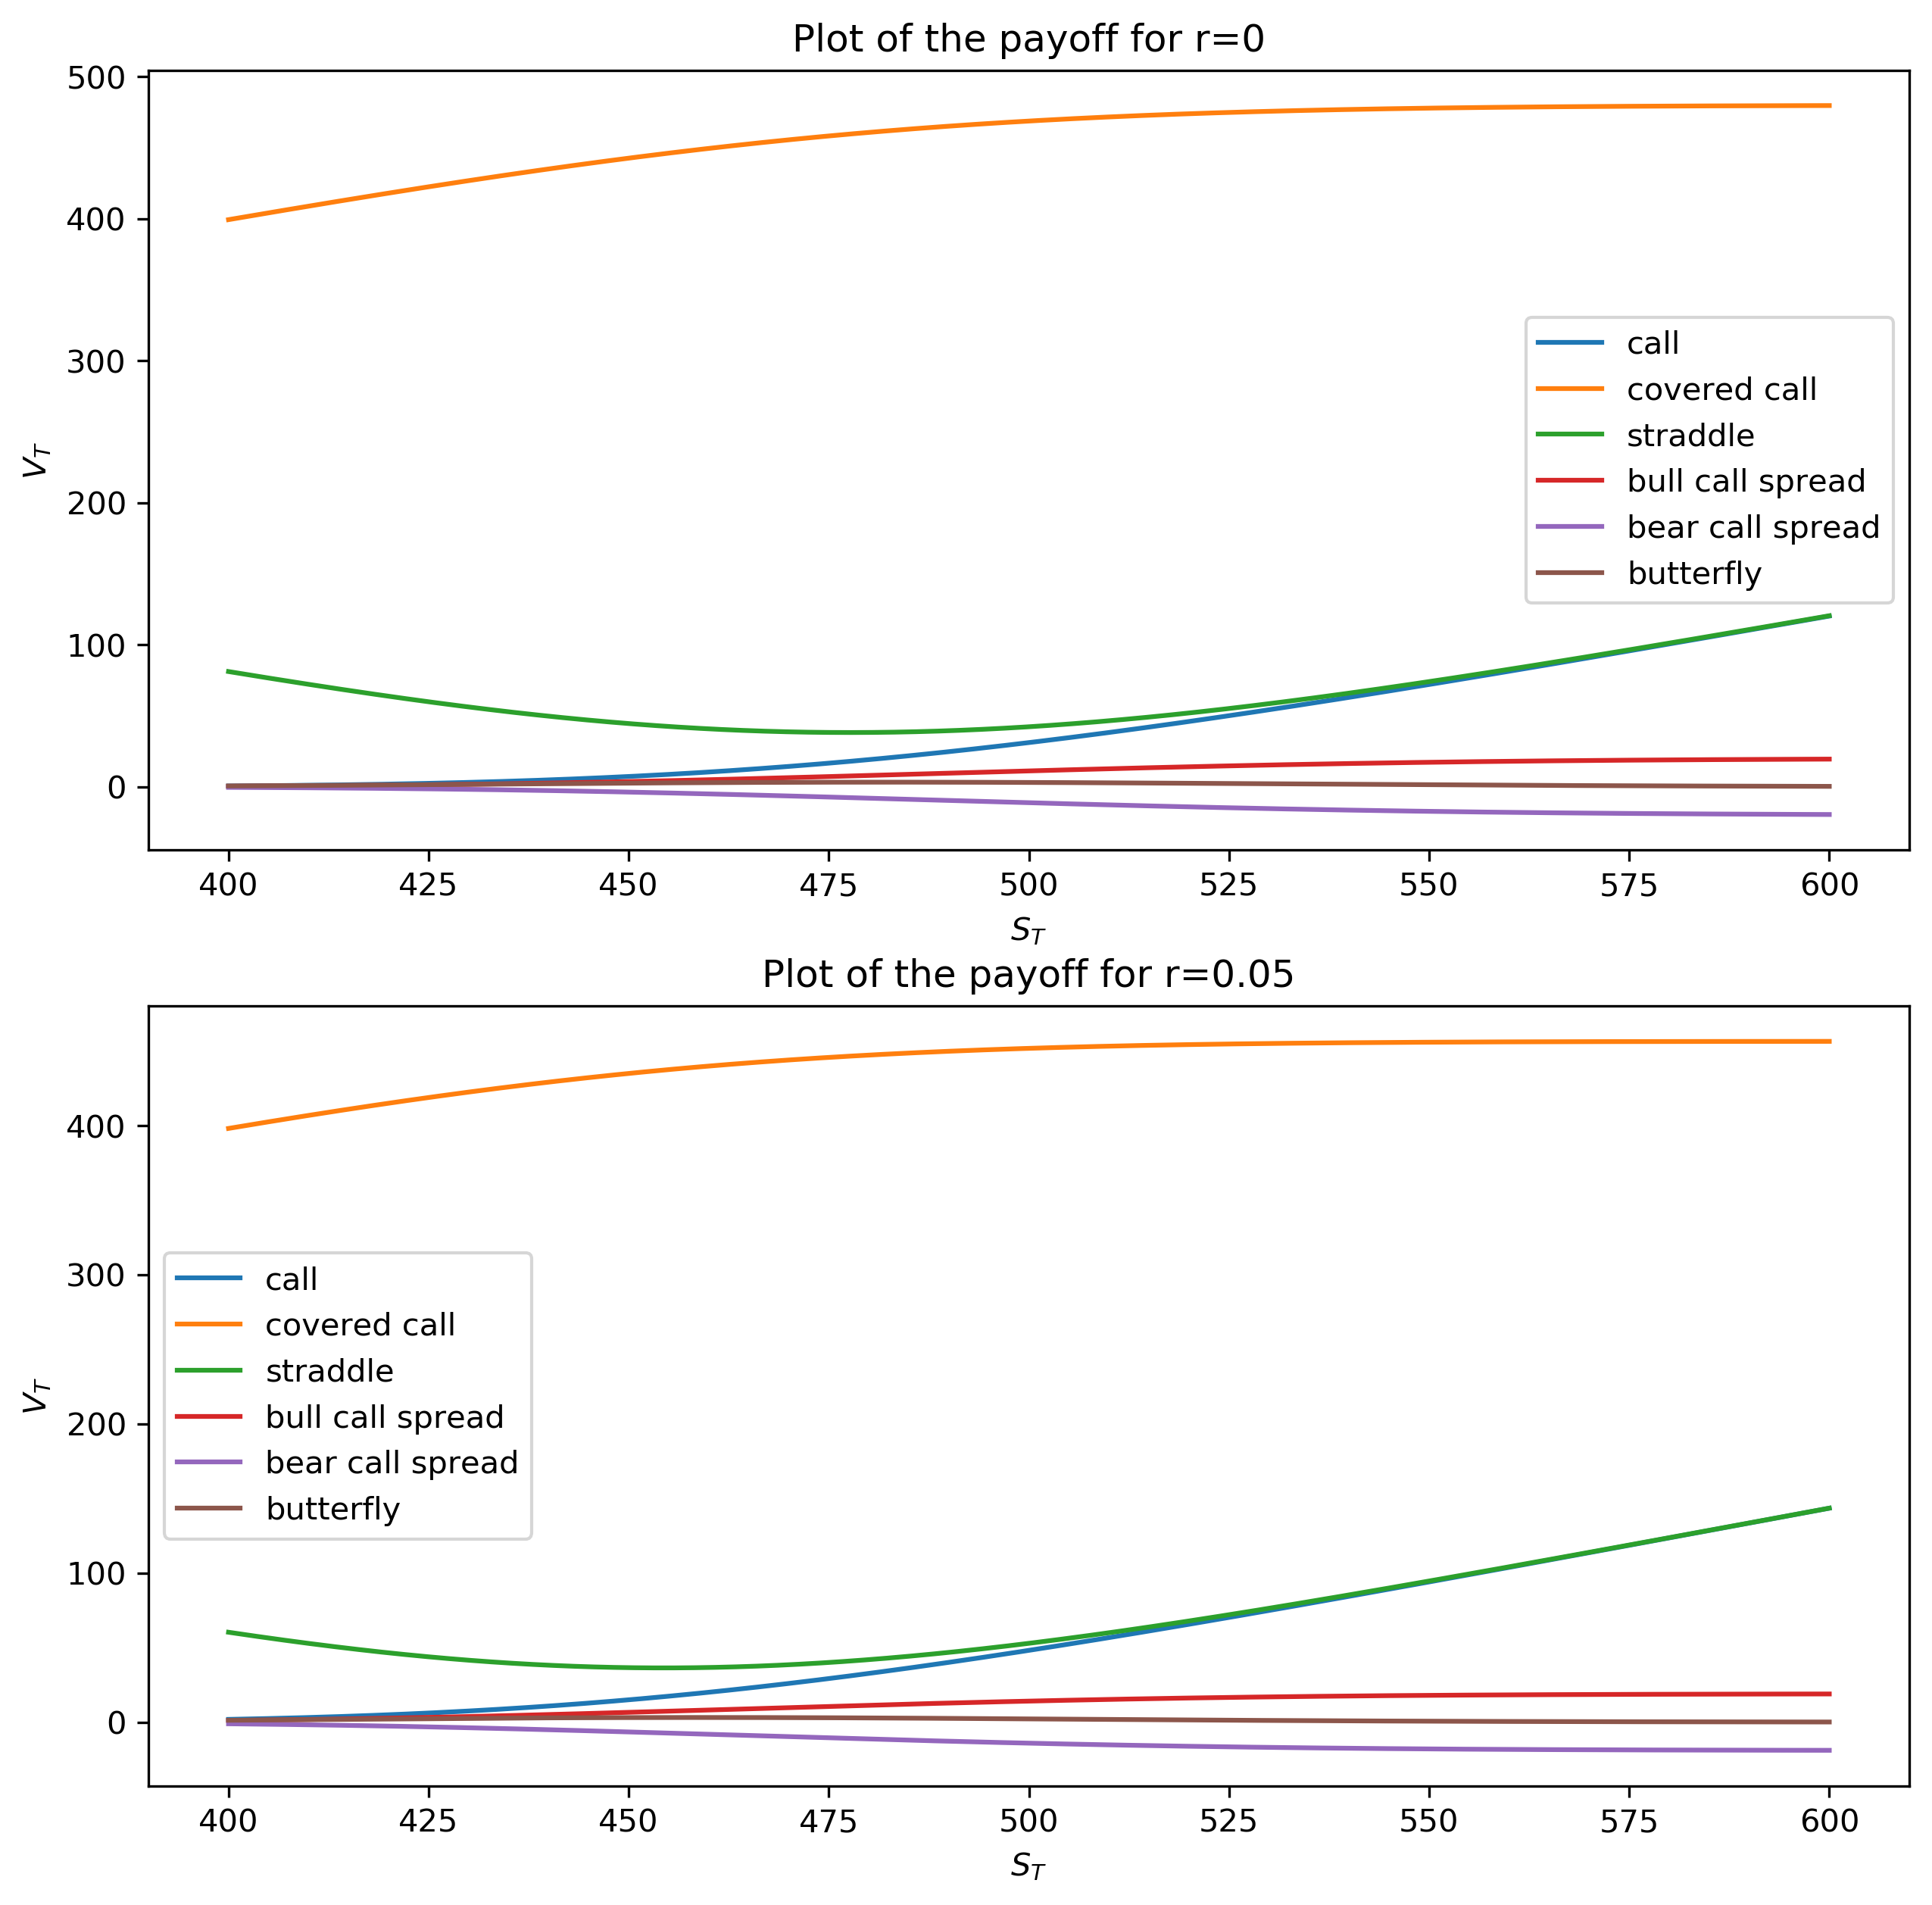

In [6]:
dt = 0.1
m = int(200 / dt) + 1

r0 = 0
r1 = 0.05
x = 400 + np.array(list(range(m))) * dt
paths0 = np.array(
    [get_BS_payoffs(T, K, 400 + dt * i, 0, r0, sigma, a) for i in range(m)]).T
paths1 = np.array(
    [get_BS_payoffs(T, K, 400 + dt * i, 0, r1, sigma, a) for i in range(m)]).T

labels = [
    "call", "covered call", "straddle", "bull call spread", "bear call spread",
    "butterfly"
]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10),dpi=300)
for i in range(6):
    ax[0].plot(x, paths0[i], label=labels[i])
    ax[1].plot(x, paths1[i], label=labels[i])

ax[0].set_title('Plot of the payoff for r=0')
ax[1].set_title('Plot of the payoff for r=0.05')
ax[0].set_xlabel("$S_T$")
ax[1].set_xlabel("$S_T$")
ax[0].set_ylabel("$V_T$")
ax[1].set_ylabel("$V_T$")
ax[0].legend()
ax[1].legend()
plt.show()

There are indeed changes when we modify $r$.

# Project 10.5

Implied volatility. Let’s build a code to evaluate the implied volatility as explained in Example 10.24. This can be done with the numerical solver fsolve available in the Python package scipy.optimize.

Use fsolve to solve the equation of the implied volatility (10.30) when $𝐶_{market} =0.4625$ and $𝑇=1,𝑟=0.05,𝑆_0 =100,𝑡=0,𝐾=120$.

You need to enter an a priori guess for the solution when using fsolve.


In [7]:
# the wrapper that calculates the implied vol
def BS_implied_vol(T, K, S, t, r, market_price):
    helper = lambda sigma: BS(T, K, S, t, r, sigma)[0] - market_price
    implied_vol = fsolve(helper, 0.3)[0] # the a-priori guess is set as 0.3
    return implied_vol

iv = BS_implied_vol(1,120,100,0,0.05,0.4625)
print("The implied volatility of the option is {:.8f}".format(iv))

The implied volatility of the option is 0.10000020
